# Telco Customer Churn

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.  

The data set includes information about:  

- Customers who left within the last month – the column is called Churn  
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  
- Demographic info about customers – gender, age range, and if they have partners and dependents  

## Process for this model building
- Importing necessary libraries
- Importing Data and getting familiar with the dataset
- Data Cleaning
- Explanatory Data Analysis
- Preprocessing the dataset
- Model Fitting
- Plotting Roc and finding AUC

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
# loading the csv data to a Pandas DataFrame
data=pd.read_csv("C:/Users/Khyati/Downloads/telecom.csv")

In [3]:
# print first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

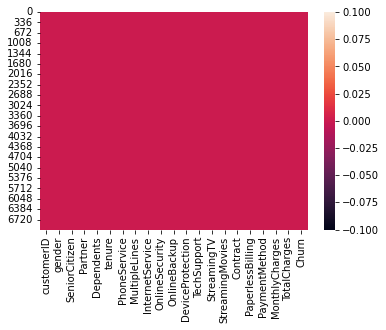

In [8]:
sns.heatmap(data.isnull())

## Data Cleaning

In [9]:
data.SeniorCitizen=data['SeniorCitizen'].astype('str')

In [10]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking null values

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

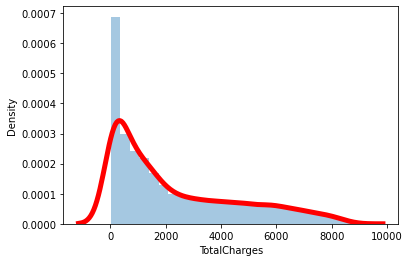

In [13]:
sns.distplot(data['TotalCharges'],kde_kws={'linewidth':5,'color':'red'})

In [14]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [15]:
data.isnull().sum().any()

False

**There are no more null values in our dataset**

In [16]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
['0' '1']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


### Separating numerical and categorical features

In [17]:
numerical=[column_name for column_name in data.columns if data[column_name].dtype=='float64' or data[column_name].dtype=='int64']

In [18]:
categorical=[column_name for column_name in data.columns if data[column_name].dtype=='object']

In [19]:
print('numerical:',numerical)
print('categorical:',categorical)

numerical: ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [20]:
data[numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [21]:
data[categorical].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## EDA

<AxesSubplot:>

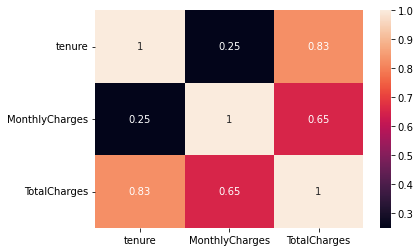

In [22]:
sns.heatmap(data.corr(),annot=True)

**Observaion: There is a high correlation in between (Tenure,TotalCharges) and (MonthlyCharges,TotalCharges)**

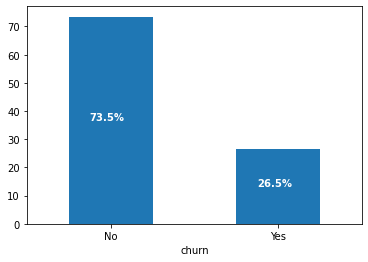

In [23]:
fig = (data['Churn'].value_counts(normalize=True) * 100).plot(kind='bar', rot=0)
fig.set_xlabel('churn')

for patch in fig.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    # value, (x, y)
    fig.annotate('{}%'.format(round(height, 1)), (x+0.25*width, y+0.5*height), color='white', weight='bold')

**observation: In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn.**

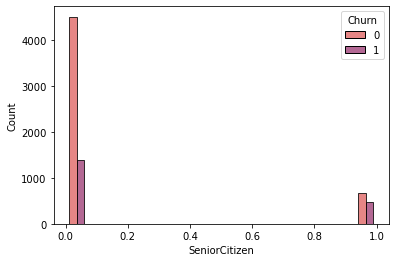

In [48]:
sns.histplot(data=data, x="SeniorCitizen", hue="Churn", multiple="dodge", palette ='flare',shrink=.7);


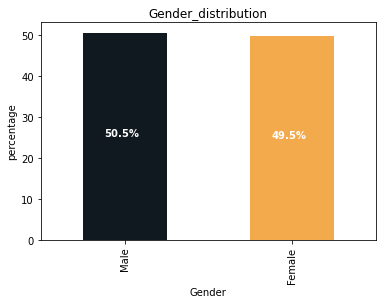

In [25]:
fig = (data['gender'].value_counts(normalize=True) * 100).plot(kind='bar', color=['#101820FF', '#F2AA4CFF'])
fig.set_xlabel('Gender')
fig.set_ylabel('percentage')
fig.set_title('Gender_distribution')

for patch in fig.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    # value, (x, y)
    fig.annotate('{}%'.format(round(height, 1)), (x+0.25*width, y+0.5*height), color='white', weight='bold')

**Observation:The data is equally distributed, Half males and Half Females**

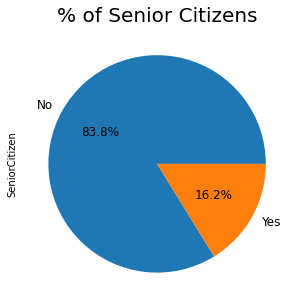

In [26]:
ax = (data['SeniorCitizen'].value_counts(normalize=True)*100.0)\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 20);

**Observation:There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.**

Text(0, 0.5, '# of Customers')

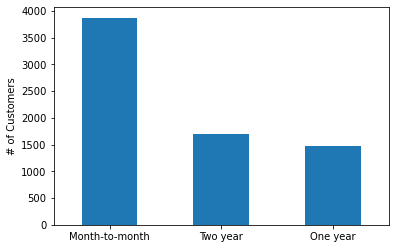

In [27]:
ax = data['Contract'].value_counts().plot(kind='bar', rot=0)
ax.set_ylabel('# of Customers')

**Observation:so the tenure distribution is like this because most of the customers contract type is month-to-month**

In [28]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

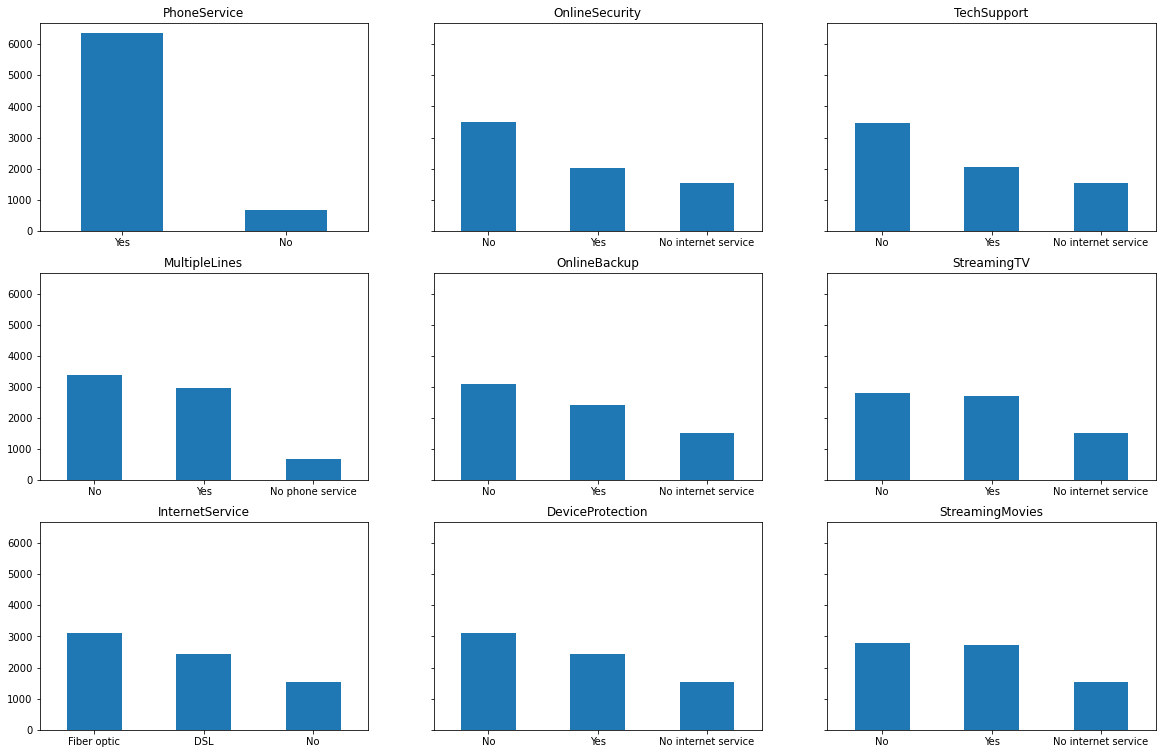

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey = True, figsize = (20,13))

for i in range(len(services)):
    ax = data[services[i]].value_counts().plot(kind='bar', ax=axes[i%3, i//3], rot=0)
    ax.set_title(services[i])

<AxesSubplot:>

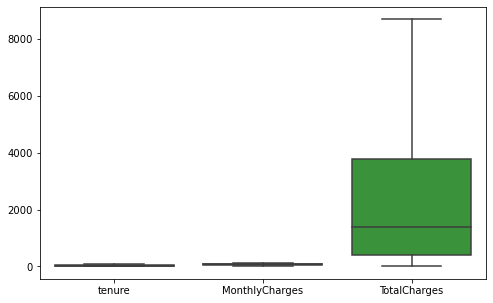

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data)

**Findings: There are no outliers in the dataset**

## Data Preprocessing

### Feature Scaling: To bring all the labels in numeric form

In [31]:
data.drop('customerID', inplace=True, axis=1)

In [32]:
data['gender']=data['gender'].replace({'Male':0,'Female':1}).astype('int')
data.SeniorCitizen = pd.to_numeric(data.SeniorCitizen,errors='coerce')
data['Partner']=data['Partner'].replace({'No':0,'Yes':1}).astype('int')
data['Dependents']=data['Dependents'].replace({'No':0,'Yes':1}).astype('int')
data['PhoneService']=data['PhoneService'].replace({'No':0,'Yes':1}).astype('int')
data['MultipleLines']=data['MultipleLines'].replace({'No':0,'Yes':1,'No phone service':2}).astype('int')
data['InternetService']=data['InternetService'].replace({'No':0,'Fiber optic':1,'DSL':2}).astype('int')
data['OnlineSecurity']=data['OnlineSecurity'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['OnlineBackup']=data['OnlineBackup'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['DeviceProtection']=data['DeviceProtection'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['TechSupport']=data['TechSupport'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['StreamingTV']=data['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['StreamingMovies']=data['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':2}).astype('int')
data['Contract']=data['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2}).astype('int')
data['PaperlessBilling']=data['PaperlessBilling'].replace({'No':0,'Yes':1}).astype('int')
data['PaymentMethod']=data['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}).astype('int')


In [33]:
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])

In [34]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


### Data Standarization:The Process of Standarizing the data to a common format and common range

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_x=scaler.fit_transform(x)

In [37]:
standard_x

array([[ 1.00955867, -0.43991649,  1.03453023, ..., -1.14519806,
        -1.16032292, -0.99424194],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.27474372,
        -0.25962894, -0.17324413],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.27474372,
        -0.36266036, -0.95967407],
       ...,
       [ 1.00955867, -0.43991649,  1.03453023, ..., -1.14519806,
        -1.1686319 , -0.85446945],
       [-0.99053183,  2.27315869,  1.03453023, ..., -0.27474372,
         0.32033821, -0.87206242],
       [-0.99053183, -0.43991649, -0.96662231, ...,  0.59571063,
         1.35896134,  2.01428802]])

## MODEL FITTING

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score


In [39]:
x=standard_x
y=data["Churn"]

### Train Test Split of dataset

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [41]:
print(x.shape,x_train.shape,x_test.shape)

(7043, 19) (4930, 19) (2113, 19)


### Logistic Regression

In [42]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=logmodel.predict(x_test)

0.8088026502602934
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



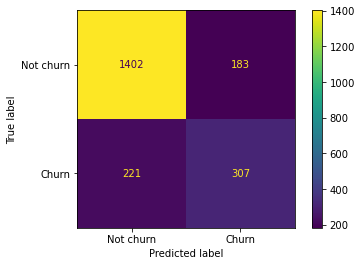

In [44]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Not churn','Churn'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


## Plot ROC and Compare AUC

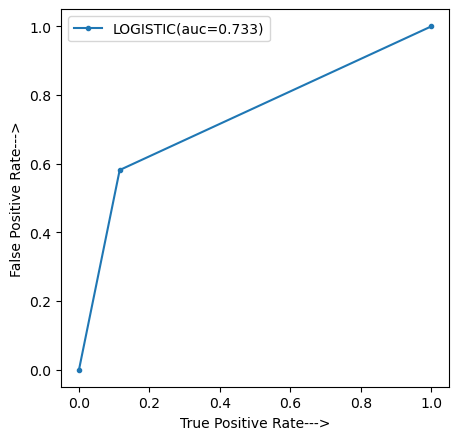

In [47]:
from sklearn.metrics import roc_curve,auc

logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)
plt.ylabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()


**Result: From the above ROC curve, we concluded that the algorithm of Logistic Regression gave an accuracy of 80.8% and an AUC score of 73.3%**